In [63]:
import pandas as pd
import numpy as np
np.random.seed(42)

df = pd.read_csv('../NSE_data_all_stocks_2022_jan_to_may (1).csv')
df

,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price
0,3-Jan-22,EGAD,Eaagads Ltd,10,15,13.5,13.8,13.5,13.5,-,-,"4,000",-
1,3-Jan-22,KUKZ,Kakuzi Plc,355,427,385,385,385,385,-,-,-,-
2,3-Jan-22,KAPC,Kapchorua Tea Kenya Plc,80,101,99.5,99.5,99.5,95.5,4,4.19%,100,-
3,3-Jan-22,LIMT,Limuru Tea Plc,260,360,320,320,320,320,-,-,-,-
4,3-Jan-22,SASN,Sasini Plc,16.75,22.6,18.7,18.7,18.7,18.7,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6727,31-May-22,MSC,Mumias Sugar Company Ltd,0.27,0.27,0.27,0.27,0.27,0.27,-,-,-,-
6728,31-May-22,UNGA,Unga Group Ltd,26.1,36.4,29,29,29,30,-1,3.33%,"2,100",-
6729,31-May-22,SCOM,Safaricom Plc,25.5,45.25,25.95,26.45,26,26.25,-0.25,0.95%,"20,079,900",-
6730,31-May-22,FAHR,Stanlib Fahari Income-REIT,5,7.48,5.5,5.6,5.56,5.58,-0.02,0.36%,"11,700",-


In [64]:
#Custom Data cleaner 
import random
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler   
nsc_scaler = StandardScaler()

class NSEDataPreProcessor(BaseEstimator, TransformerMixin):
    
    def __init__(self,company_code ,columns_to_type_cast, columns_to_scale, columns_to_return):
        self.company_code = company_code        
        self.to_type_cast= columns_to_type_cast 
        self.to_return= columns_to_return
        self.to_scale=columns_to_scale  #same as  columns_to_type_cast but has the company code.
        
        
    def __type_cast_and_scale_xyz_df(self, xyz_data_frame):
        for column_name in self.to_type_cast:
            xyz_data_frame[column_name] = pd.to_numeric(xyz_data_frame[column_name], errors='coerce')
        xyz_data_frame[self.to_scale] = nsc_scaler.fit_transform(xyz_data_frame[self.to_scale])
        
        
        return xyz_data_frame[self.to_return]
    
    def fit(self, X, y=None):
        return self      

    def transform(self, X):  
        
        """
        X - NSC dataFrame
        Selects the data for one company , then names it xyz_company_data_frame 
        NB: Scaler always return columns that are assignable to the dataframe.        
        """        
        
        xyz_company_data_frame = X[X['Code'] == self.company_code].reset_index(drop=True)
        type_converted_xyz_company_df = self.__type_cast_and_scale_xyz_df(
            xyz_company_data_frame       
        )
        
        return type_converted_xyz_company_df
    
# 'Code','Day Price','Day High', 'Day High', '12m High', '12m Low' , 'Day Price','Day High', 'Day High', '12m High', '12m Low'

random_company_code = random.choice(df.Code)

#TPSE, UMME  giving the best results .
    
__nse_dat_preprocessor = NSEDataPreProcessor(
    company_code= random_company_code,
    columns_to_type_cast=['Day Price','Day High', 'Day Low', '12m High', '12m Low'],
    columns_to_scale=[ 'Previous','Day High', 'Day Low', '12m High', '12m Low'],
    columns_to_return=['Code','Day Price','Previous','Day High', 'Day Low', '12m High', '12m Low'], 
)
xyz_preprocessed_df = __nse_dat_preprocessor.fit_transform(
    df,    
)
display(xyz_preprocessed_df.head(2)) #Show the company being worked on .

preprocessed_df = xyz_preprocessed_df.drop(columns=['Code'])
preprocessed_df
    

,Code,Day Price,Previous,Day High,Day Low,12m High,12m Low
0,SLAM,11.55,-0.21751,-0.267002,-0.192962,0.0,0.0
1,SLAM,11.55,-0.21751,-0.267002,-0.192962,0.0,0.0


,Day Price,Previous,Day High,Day Low,12m High,12m Low
0,11.55,-0.217510,-0.267002,-0.192962,0.0,0.0
1,11.55,-0.217510,-0.267002,-0.192962,0.0,0.0
2,11.55,-0.217510,-0.267002,-0.192962,0.0,0.0
3,11.55,-0.217510,-0.267002,-0.192962,0.0,0.0
4,11.55,-0.217510,-0.267002,-0.192962,0.0,0.0
...,...,...,...,...,...,...
97,14.00,1.740602,1.171321,1.247340,0.0,0.0
98,14.00,1.236240,1.171321,1.247340,0.0,0.0
99,14.00,1.236240,1.171321,1.247340,0.0,0.0
100,14.00,1.236240,1.171321,1.247340,0.0,0.0


In [65]:
x_features = ['Previous','Day High', 'Day Low', '12m High', '12m Low']
y_classes = 'Day Price'


day_price_df = preprocessed_df[['Day Price']]
day_price_df


,Day Price
0,11.55
1,11.55
2,11.55
3,11.55
4,11.55
...,...
97,14.00
98,14.00
99,14.00
100,14.00


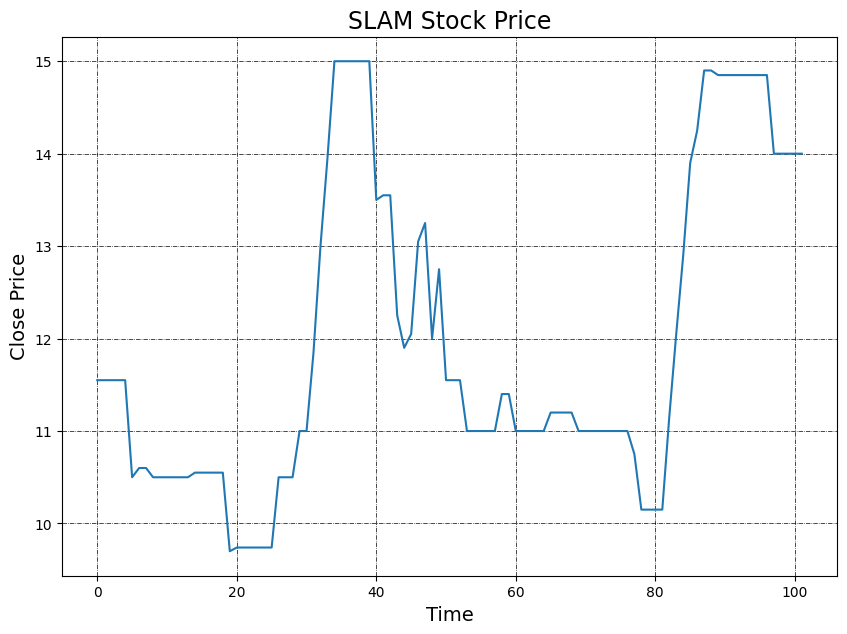

In [66]:
# Time series for Stocks for different companies
import matplotlib.pyplot as plt 

# Plotting the data
day_price_df['Day Price'].plot(figsize=(10, 7))
plt.title(random_company_code + " Stock Price", fontsize=17)
plt.ylabel('Close Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [67]:
import pandas_ta as ta

day_price_df = day_price_df.copy()  #we need to create a copy  of a dataframe before modifying it .


day_price_df.loc[:, 'EMA'] = ta.ema(day_price_df['Day Price'], length=4)

day_price_df



,Day Price,EMA
0,11.55,NaN
1,11.55,NaN
2,11.55,NaN
3,11.55,11.550000
4,11.55,11.550000
...,...,...
97,14.00,14.504734
98,14.00,14.302840
99,14.00,14.181704
100,14.00,14.109023


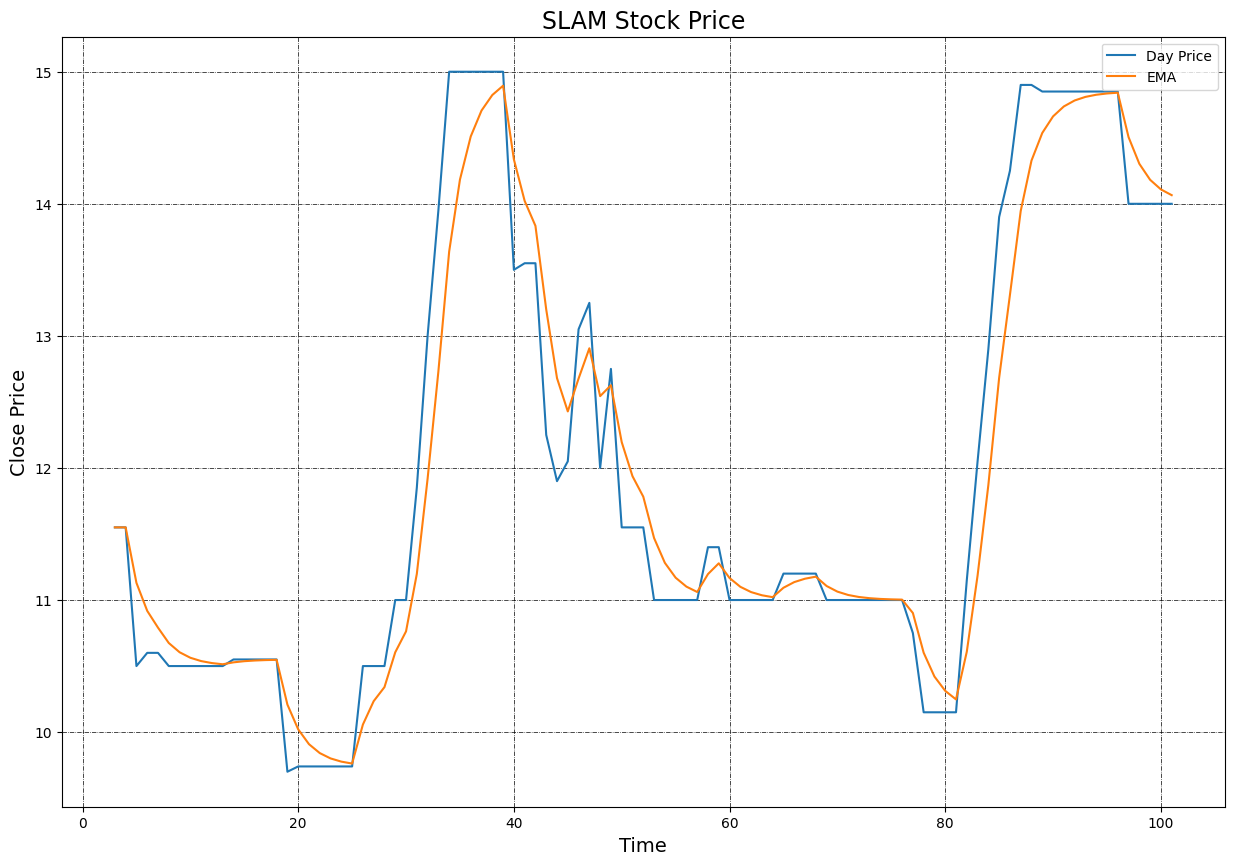

In [68]:
day_price_df.dropna(subset=['EMA'], inplace=True)
day_price_df[['Day Price', 'EMA']].plot(figsize=(15, 10))
plt.title(random_company_code + " Stock Price", fontsize=17)
plt.ylabel('Close Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [69]:
from sklearn.model_selection import train_test_split

feature = day_price_df[['EMA']]
target = day_price_df[['Day Price']]
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=.2, random_state=42)
X_train.shape


(79, 1)

In [70]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train,y_train)

# Making predictions
y_pred = lin_reg.predict(X_test)
y_pred

array([[11.11078141],
       [13.28620098],
       [14.42502209],
       [ 9.88789462],
       [14.22490247],
       [14.05631689],
       [11.18151053],
       [12.48917874],
       [10.51254448],
       [11.5826756 ],
       [13.7392601 ],
       [10.41659723],
       [12.24938023],
       [10.60626379],
       [12.98283141],
       [10.79879088],
       [ 9.73638446],
       [10.53661936],
       [14.87343091],
       [11.01786035]])

In [71]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import xgboost

In [72]:

model = xgboost.XGBRegressor(objective='reg:squarederror')  # Specifies regression objective

cross_val_scores = cross_val_score(model, feature, target, cv=5, scoring='neg_mean_squared_error')

print("Gradient Boosting Regressor Cross-Validation Scores:", end=' ')
print(cross_val_scores)

average_score = np.mean(cross_val_scores)
print(f"\nAverage Performance Metric: {average_score:.2f}")

Gradient Boosting Regressor Cross-Validation Scores: [-0.18118704 -0.46996981 -0.65080793 -0.16302709 -0.75658859]

Average Performance Metric: -0.44


In [73]:
base_model = xgboost.XGBRegressor(objective='reg:squarederror', random_state=42)

hyper_parameter_grid ={
    'n_estimators': [100, 200, 300,500,1000],
    'learning_rate': [0.01,0.15, 0.1, 0.2],
    'booster':['gbtree','gblinear'],
    'max_depth': [3, 5,7,15],
    'min_child_weight': [1, 3,5,7,9,10],

}
grid_search =RandomizedSearchCV(
    estimator=base_model, 
    param_distributions= hyper_parameter_grid,
    cv=5,
    n_iter=100, 
    scoring='neg_mean_squared_error', 
    n_jobs=-1
)
# grid_search =GridSearchCV(estimator=base_model, param_grid= hyper_parameter_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)


/home/kering/Desktop/MachineLearningProjects/KnowledgeBasedSystemsML/KnowledgeBasedSystemsVenv/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [19:44:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/home/kering/Desktop/MachineLearningProjects/KnowledgeBasedSystemsML/KnowledgeBasedSystemsVenv/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [19:44:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/home/kering/Desktop/MachineLearningProjects/KnowledgeBasedSystemsML/KnowledgeBasedSystemsVenv/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [19:44:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/home/kering/Desktop/MachineLearningProjects/KnowledgeBasedSystemsML/Knowled

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.01, 0.15, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 15],
                                        'min_child_weight': [1, 3, 5, 7, 9, 10],
                                        'n_estimators': [100, 200, 300, 500,
                                                         1000]},
                   scoring='neg_mean_squared_error')

In [74]:
best_params = grid_search.best_params_
best_params


{'n_estimators': 100,
 'min_child_weight': 9,
 'max_depth': 3,
 'learning_rate': 0.1,
 'booster': 'gbtree'}

In [75]:
final_model = xgboost.XGBRegressor(objective='reg:squarederror', random_state=42, **best_params)
final_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=9, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [76]:
import pandas as pd

predicted_stock_prices = final_model.predict(X_test)

results=pd.DataFrame({
    "Actual":y_test['Day Price'].values,
    "Predicted":predicted_stock_prices.flatten()
})
results


,Actual,Predicted
0,11.20,10.983750
1,12.25,13.826138
2,14.00,14.529220
3,9.74,10.008703
4,14.00,13.985271
5,14.90,13.866694
6,11.20,11.047131
7,12.05,12.167393
8,10.50,10.483730
9,11.55,11.665697


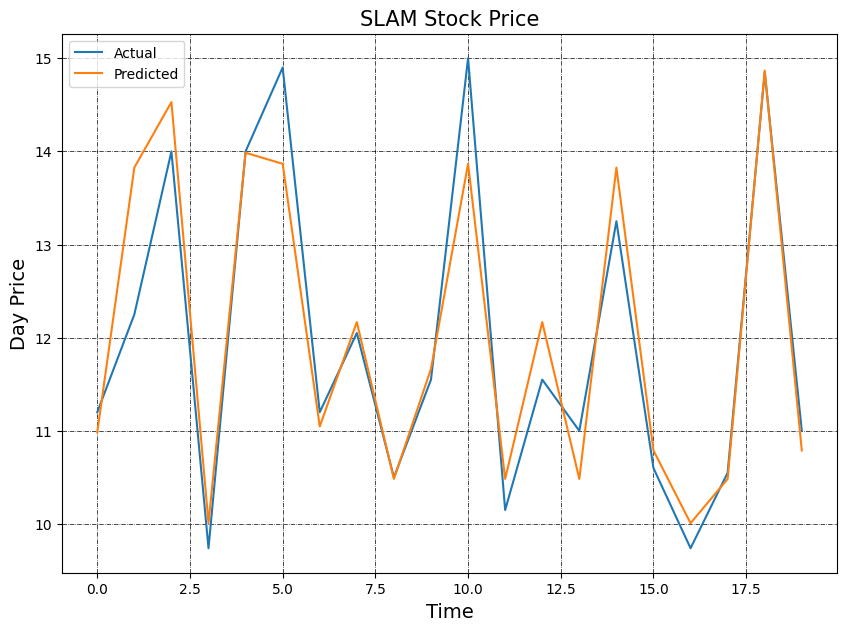

In [79]:


results[['Actual', 'Predicted']].plot(figsize=(10, 7))
plt.title(random_company_code + " Stock Price", fontsize=15)
plt.ylabel('Day Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()